# Predicting Stock Price with Meta Prophet

## 1. Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from prophet import Prophet


FMP_API_KEY = '0fe29ad91a51003c563d3ec9fe13637a'

## 2. Importing Data


In [13]:
symbol = "NVDA"
from_date = "2022-01-01"
to_date = "2023-12-31"
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={from_date}&to={to_date}&apikey={FMP_API_KEY}"

def fetch_data(url):
    response = requests.get(url).json()
    return response
    
data = fetch_data(url)



In [14]:
## 3. Data Preprocessing
def preprocess_data(data):
    df = pd.DataFrame(data["historical"])
    df.reset_index(inplace=True)
    df.rename(columns={'date': 'ds', 'adjClose': 'y'}, inplace=True)
    return df
    
df = preprocess_data(data)
display(df.head())

,index,ds,open,high,low,close,y,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,0,2023-12-29,498.13,499.9700,487.51,495.22,495.22,38869330,38869000,-2.91,-0.58418,495.19,"December 29, 23",-0.005842
1,1,2023-12-28,496.43,498.8399,494.12,495.22,495.22,24658748,24658700,-1.21,-0.24374,496.42,"December 28, 23",-0.002437
2,2,2023-12-27,495.11,496.8000,490.85,494.17,494.17,23364798,23364800,-0.94,-0.18986,493.59,"December 27, 23",-0.001899
3,3,2023-12-26,489.68,496.0000,489.60,492.79,492.79,24314752,24420000,3.11,0.63511,493.57,"December 26, 23",0.006351
4,4,2023-12-22,491.95,493.8300,484.67,488.30,488.30,25227676,25213900,-3.65,-0.74195,489.79,"December 22, 23",-0.007419


## 4. Training Model


In [15]:
def train_prophet_model(data):
    model = Prophet(
        changepoint_prior_scale=0.05,
        holidays_prior_scale=15,
        seasonality_prior_scale=10,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False
    )
    model.add_country_holidays(country_name='US')
    model.fit(data)
    return model

model = train_prophet_model(df)

17:11:21 - cmdstanpy - INFO - Chain [1] start processing
17:11:21 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
## 5. Forecasting


/Users/jacobtuchinsky/anaconda3/envs/timeseries/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jacobtuchinsky/anaconda3/envs/timeseries/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


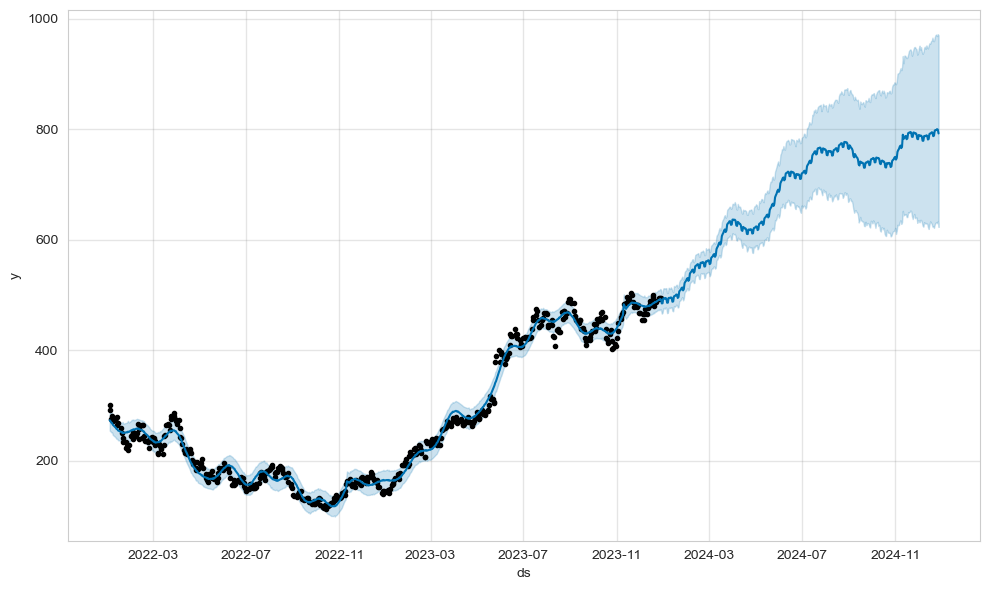

In [17]:

def forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

forecast = forecast(model)

def plot_forecast(model, forecast):
    model.plot(forecast)

plot_forecast(model, forecast)
plt.show()

